In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader

from adapters import *
from dataset import NumpyCsvDataSet
from runner import ExptRunner
from networks.autoencoder import AutoEncoder
from networks.composedautoencoder import ComposedAutoEncoder
from networks.lossfunctions import *

In [3]:
opt = np.get_printoptions()
np.set_printoptions(threshold=np.inf)

In [4]:
data_folder = 'data/demoplanner/version1'
train_data = NumpyCsvDataSet(data_folder + '/train.csv')
test_data = NumpyCsvDataSet(data_folder + '/test.csv')
training_loader = DataLoader(train_data, batch_size=50, shuffle=True)
test_loader = DataLoader(test_data, batch_size=3, shuffle=True)

In [5]:
print (train_data.data.shape)
print (test_data.data.shape)

torch.Size([13280, 2058])
torch.Size([1341, 2058])


In [6]:
net = ComposedAutoEncoder()

In [8]:
runner = ExptRunner('Training-DemoPl-Img-Encoder-', net, demopl_v1_data_adapter, mse_loss_adapter)

Log folder : runs/Training-DemoPl-Img-Encoder-03-10-20-15-46


In [9]:
runner.train(5, training_loader)

torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
255.0
235.31471


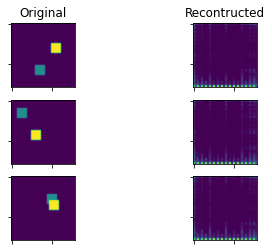

In [10]:
runner.test(test_loader, demopl_v1_data_to_img)

In [11]:
np.set_printoptions(**opt)